<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/LinReg_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from Scratch**

### Machine Learning
Mikel Ignacio Barajas Martínez

01/28/24



## **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
accidents.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/ML/accidents.csv", header=None)
print(df)


           0     1
0     493782   164
1     572059    43
2     608827    98
3     626932   101
4     642200   100
5     754844   197
6     783600   134
7     902195   229
8    1048319    83
9    1211537   142
10   1235786   171
11   1274923   194
12   1293953   260
13   1711263   254
14   1808344   411
15   1819046   521
16   1998257   395
17   2233169   296
18   2673400   704
19   2688418   461
20   2844658   900
21   2926324   390
22   3405565   291
23   3421399   456
24   3450654   774
25   4012012  1046
26   4041769   964
27   4301261   665
28   4447100  1154
29   4468976   904
30   4919479   567
31   5130632  1150
32   5296486   643
33   5363675   792
34   5595211  1130
35   5689283  1288
36   5894121   563
37   6080485   947
38   6349097   476
39   7078515   925
40   8049313  1557
41   8186453  1634
42   8414350   731
43   9938444  1159
44  11353140  1286
45  12281054  1490
46  12419293  1356
47  15982378  3244
48  18976457  1493
49  20851820  3583
50  33871648  4120


In [ ]:
df

,0,1
0,493782,164
1,572059,43
2,608827,98
3,626932,101
4,642200,100
5,754844,197
6,783600,134
7,902195,229
8,1048319,83
9,1211537,142


## **Ordinary Least Squares**

OLS: y = 0.0001256394273876983x + 142.71201717265376
>MSE: 113495.26801814968
>R2: 0.8382105311034282


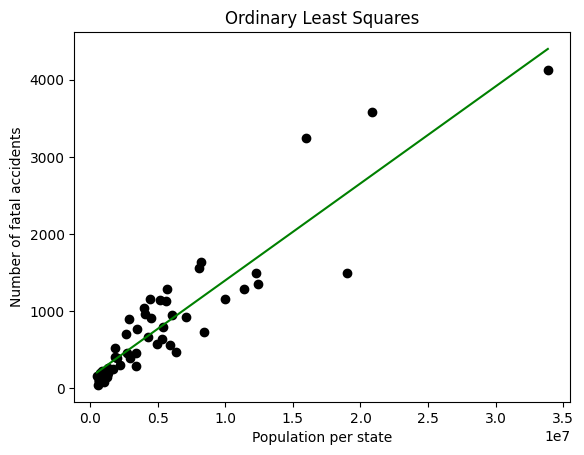

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv("/content/gdrive/My Drive/ML/accidents.csv", header=None)

x = df[0]
y = df[1]

x_mean = np.mean(x)
y_mean = np.mean(y)

top = 0
bottom = 0

for i in range(len(df)):
    top += (x[i] - x_mean) * (y[i] - y_mean)
    bottom += (x[i] - x_mean) ** 2

a1 = top / bottom #slope
a0 = y_mean - a1 * x_mean #y-intercept

y_OLS = [a1 * xi + a0 for xi in x]

print(f'OLS: y = {a1}x + {a0}')
print(f'>MSE: {mean_squared_error(y, y_OLS)}')
print(f'>R2: {r2_score(y, y_OLS)}')

plt.title('Ordinary Least Squares')
plt.scatter(x, y, color = 'black')
plt.plot(x, y_OLS, color = 'green')
plt.xlabel('Population per state')
plt.ylabel('Number of fatal accidents')

plt.show()

## **Theil-Sen Estimator**

TSE: y = 0.0001504985303040703x + 5.53758336528972
>MSE: 136514.96625403548
>R2: 0.8053955528512272


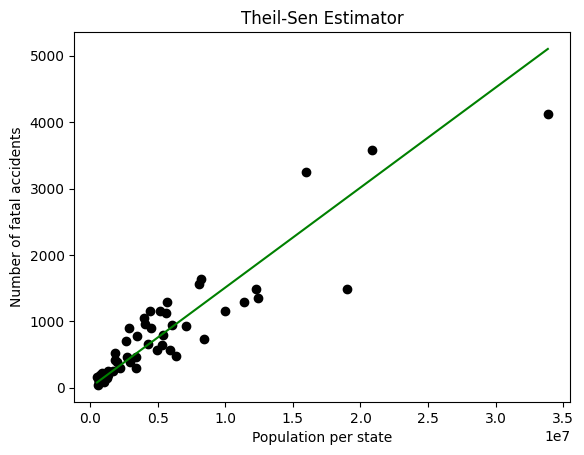

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv("/content/gdrive/My Drive/ML/accidents.csv", header=None)

x = df[0]
y = df[1]

x_mean = np.mean(x)
y_mean = np.mean(y)

m_acum = 0
n = len(df)

for i in range(n):
    for j in range(i + 1, n):
        m_acum += (y[j] - y[i])/(x[j] - x[i])

num_of_pairs = n*(n-1)/2
a1 = m_acum / num_of_pairs
a0 = y_mean - a1 * x_mean #y-intercept

y_TSE = [a1 * xi + a0 for xi in x]

print(f'TSE: y = {a1}x + {a0}')
print(f'>MSE: {mean_squared_error(y, y_TSE)}')
print(f'>R2: {r2_score(y, y_TSE)}')

plt.title('Theil-Sen Estimator')
plt.scatter(x, y, color = 'black')
plt.plot(x, y_TSE, color = 'green')
plt.xlabel('Population per state')
plt.ylabel('Number of fatal accidents')

plt.show()

## **Evaluation**

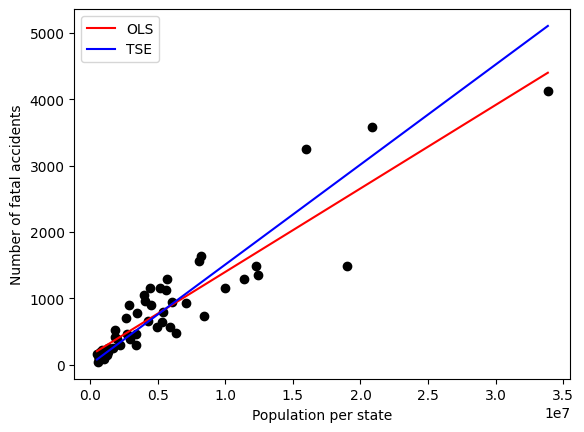

In [ ]:
plt.scatter(x, y, color = 'black')
plt.plot(x, y_OLS, color = 'red', label = 'OLS')
plt.plot(x, y_TSE, color = 'blue', label = 'TSE')

plt.xlabel('Population per state')
plt.ylabel('Number of fatal accidents')

plt.legend()
plt.show()

## **For fun**

Scikit: y = [[0.00012564]]x + [142.71201717]
>MSE: 113495.26801814968
>R2: 0.8382105311034282


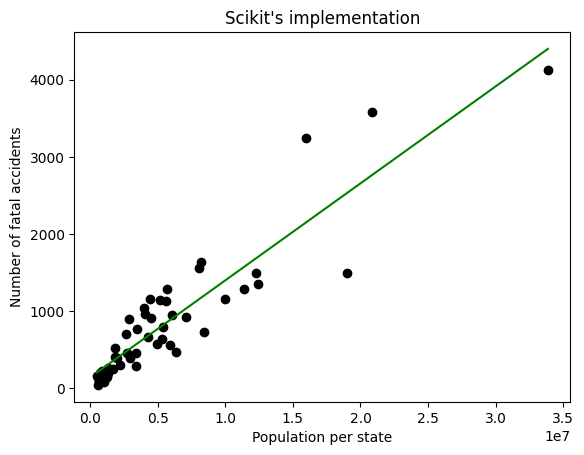

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
x_train = x.values.reshape(-1, 1)
y_train = y.values.reshape(-1, 1)

regr.fit(x_train, train_y)
y_pred = regr.predict(x_train)

print(f'Scikit: y = {regr.coef_}x + {regr.intercept_}')
print(f'>MSE: {mean_squared_error(y_train, y_pred)}')
print(f'>R2: {r2_score(y_train, y_pred)}')

plt.title('Scikit\'s implementation')
plt.scatter(x, y, color = 'black')
plt.plot(x_train, y_pred, color = 'green')
plt.xlabel('Population per state')
plt.ylabel('Number of fatal accidents')
plt.show()


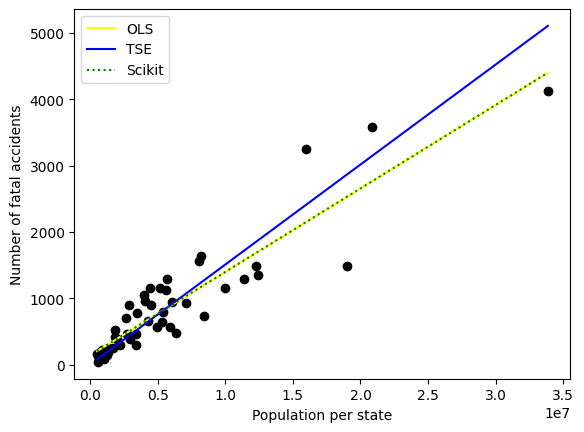

In [ ]:
plt.scatter(x, y, color = 'black')
plt.plot(x, y_OLS, color = 'yellow', label = 'OLS')
plt.plot(x, y_TSE, color = 'blue', label = 'TSE')
plt.plot(train_x, y_pred, color = 'green', label = 'Scikit', linestyle = ':')

plt.xlabel('Population per state')
plt.ylabel('Number of fatal accidents')

plt.legend()
plt.show()

#Scikit actually uses OLS, so the coefficients are the same